In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')

In [3]:
features= np.array(df.iloc[:,:12])
features

array([[63. ,  1. ,  1. , ...,  2.3,  3. ,  0. ],
       [67. ,  1. ,  4. , ...,  1.5,  2. ,  3. ],
       [67. ,  1. ,  4. , ...,  2.6,  2. ,  2. ],
       ...,
       [65. ,  1. ,  4. , ...,  2.8,  2. ,  1. ],
       [48. ,  1. ,  4. , ...,  0. ,  1. ,  2. ],
       [63. ,  0. ,  4. , ...,  4. ,  2. ,  3. ]])

In [4]:
labels= df.iloc[:,-1:].values
labels

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [5]:
dataset= pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [7]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
k=[i for i in range(1,30)]
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [11]:
from sklearn.metrics import accuracy_score
accuracy=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X)
    accuracy.append(accuracy_score(y, y_pred))

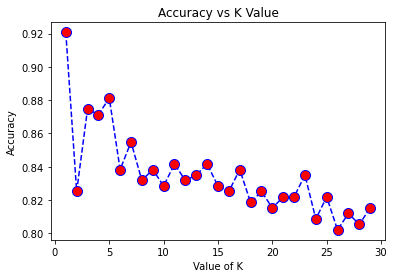

In [12]:
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.plot(k,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

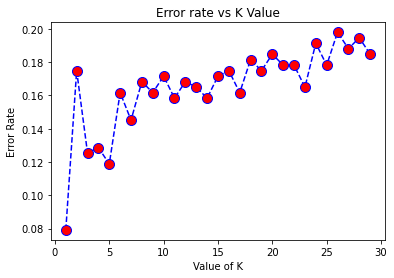

In [13]:
error=[(1-i) for i in accuracy]
plt.xlabel("Value of K")
plt.ylabel("Error Rate")
plt.title("Error rate vs K Value")
plt.plot(k,error,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X)
print("Accuracy:",accuracy_score(y, y_pred))

Accuracy: 0.8811881188118812


In [15]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,

In [16]:
x1=df.drop(["target"],axis=1)
x1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,3
3,37,1,3,130,250,0,0,187,0,3.5,3,0,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,1
299,43,0,4,132,341,1,2,136,1,3.0,2,0,3
300,65,1,4,135,254,0,2,127,0,2.8,2,1,3
301,48,1,4,130,256,1,2,150,1,0.0,1,2,3


In [17]:
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values
x

C:\Users\JYOTIKA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\JYOTIKA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.25,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.0
1,0.791667,1.0,1.00,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.5
2,0.791667,1.0,1.00,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0
3,0.166667,1.0,0.75,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.5
4,0.250000,0.0,0.50,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.479167,1.0,0.25,0.226415,0.136986,0.0,1.0,0.908397,0.0,0.000000,0.5,0.000000,0.0
299,0.291667,0.0,1.00,0.358491,0.490868,1.0,1.0,0.496183,1.0,0.483871,0.5,0.000000,1.0
300,0.750000,1.0,1.00,0.386792,0.292237,0.0,1.0,0.427481,0.0,0.451613,0.5,0.333333,1.0
301,0.395833,1.0,1.00,0.339623,0.296804,1.0,1.0,0.603053,1.0,0.000000,0.0,0.666667,1.0


In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y_pred,test_size=0.3, random_state=0)

In [19]:
xtrain = xtrain.T
xtest = xtest.T
ytrain = ytrain.T
ytest = ytest.T

In [20]:
def initializing_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [21]:
#Forward & Backward Propogation

def forward_backwardpropogation(w,b,xtrain,y_train):
    #forward P.
    z = np.dot(w.T,xtrain) +  b 
    y_head = sigmoid(z)
    loss = -ytrain*np.log(y_head)-(1-ytrain)*np.log(1-y_head)
    cost = (np.sum(loss))/xtrain.shape[1]
    #backward p.
    derivative_weight = (np.dot(xtrain,((y_head-ytrain).T)))/xtrain.shape[1] 
    derivetive_bias = np.sum(y_head-ytrain)/xtrain.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivetive_bias": derivetive_bias}
    
    return cost,gradients

In [22]:
#Uptading parameters

def update(w,b,xtrain, ytrain, learning_rate, number_of_iteration):
    costlist = []
    costlist2 = []
    index = []
    #updating/learning parameters is number of iteration times
    for i in range(number_of_iteration):
        #makeforwardandbacwardprop.andfindcostandgradi
        cost,gradients = forward_backwardpropogation(w,b,xtrain,ytrain)
        costlist.append(cost)
        #updatingtime
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivetive_bias"]
        if i % 10 == 0:
            costlist2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
            
    #weupdate(learn) parameters weight & bias
    parameters = {"weight": w, "bias":b}
    plt.plot(index,costlist2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, costlist

In [23]:
#%% Prediciton Method
    
def predict(w,b,xtest):
    
    z =sigmoid(np.dot(w.T,xtest)+b)
    y_prediction = np.zeros((1,xtest.shape[1]))
    #if z > 0.5 predcition = 1 y_head=1
    #if z <= 0.5 prediciton = 0 y_head=0
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [24]:
# Logistic Reg.

def LogReg(xtrain,ytrain,xtest,ytest,learning_rate,number_of_iteration):
    #initializing
    dimension = xtrain.shape[0] 
    w,b=initializing_weights_and_bias(dimension)
    #forward & backward prop.
    parameters,gradients,costlist = update(w,b,xtrain,ytrain,learning_rate,number_of_iteration)
    
    y_prediciton_test = predict(parameters["weight"],parameters["bias"],xtest)

    #print train/test errors
    print("Test Accuracy:{} %".format(100-np.mean(np.abs(y_prediciton_test-ytest))*100))



Cost after iteration 0: 0.703946
Cost after iteration 10: 0.472497
Cost after iteration 20: 0.407243
Cost after iteration 30: 0.367833
Cost after iteration 40: 0.341245


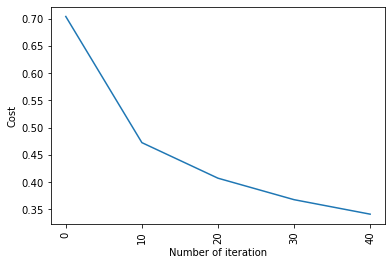

Test Accuracy:83.51648351648352 %


In [25]:
#Application1
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =50 )

Cost after iteration 0: 0.703946
Cost after iteration 10: 0.472497
Cost after iteration 20: 0.407243
Cost after iteration 30: 0.367833
Cost after iteration 40: 0.341245
Cost after iteration 50: 0.321923
Cost after iteration 60: 0.307157
Cost after iteration 70: 0.295456
Cost after iteration 80: 0.285932
Cost after iteration 90: 0.278012


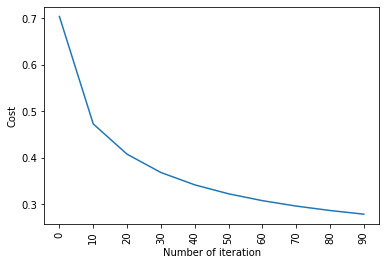

Test Accuracy:83.51648351648352 %


In [26]:
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =100 )

Cost after iteration 0: 0.703946
Cost after iteration 10: 0.472497
Cost after iteration 20: 0.407243
Cost after iteration 30: 0.367833
Cost after iteration 40: 0.341245
Cost after iteration 50: 0.321923
Cost after iteration 60: 0.307157
Cost after iteration 70: 0.295456
Cost after iteration 80: 0.285932
Cost after iteration 90: 0.278012
Cost after iteration 100: 0.271312
Cost after iteration 110: 0.265564
Cost after iteration 120: 0.260574
Cost after iteration 130: 0.256197
Cost after iteration 140: 0.252323
Cost after iteration 150: 0.248868
Cost after iteration 160: 0.245766
Cost after iteration 170: 0.242963
Cost after iteration 180: 0.240417
Cost after iteration 190: 0.238094
Cost after iteration 200: 0.235963
Cost after iteration 210: 0.234002
Cost after iteration 220: 0.232190
Cost after iteration 230: 0.230510
Cost after iteration 240: 0.228947
Cost after iteration 250: 0.227490
Cost after iteration 260: 0.226127
Cost after iteration 270: 0.224850
Cost after iteration 280: 0.223

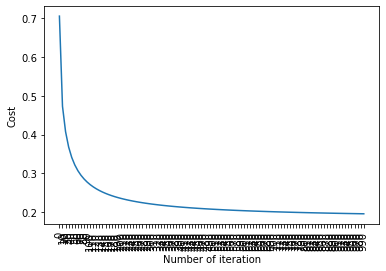

Test Accuracy:83.51648351648352 %


In [27]:
#Application3
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=1,number_of_iteration =1000)

Cost after iteration 0: 0.703946
Cost after iteration 10: 0.436109
Cost after iteration 20: 0.314126
Cost after iteration 30: 0.274324
Cost after iteration 40: 0.258197
Cost after iteration 50: 0.247251
Cost after iteration 60: 0.239251
Cost after iteration 70: 0.233123
Cost after iteration 80: 0.228263
Cost after iteration 90: 0.224303
Cost after iteration 100: 0.221007
Cost after iteration 110: 0.218216
Cost after iteration 120: 0.215817
Cost after iteration 130: 0.213730
Cost after iteration 140: 0.211896
Cost after iteration 150: 0.210270
Cost after iteration 160: 0.208817
Cost after iteration 170: 0.207510
Cost after iteration 180: 0.206328
Cost after iteration 190: 0.205252
Cost after iteration 200: 0.204269
Cost after iteration 210: 0.203366
Cost after iteration 220: 0.202535
Cost after iteration 230: 0.201767
Cost after iteration 240: 0.201054
Cost after iteration 250: 0.200392
Cost after iteration 260: 0.199774
Cost after iteration 270: 0.199197
Cost after iteration 280: 0.198

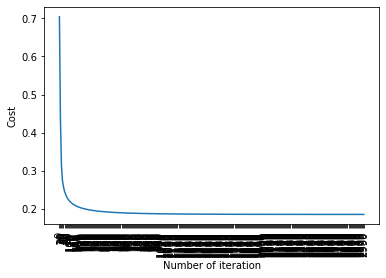

Test Accuracy:82.41758241758242 %


In [28]:
#Application4
LogReg(xtrain,ytrain,xtest,ytest,learning_rate=3,number_of_iteration =3000)

In [29]:
xtrain.T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,0.833333,1.0,0.75,0.433962,0.292237,0.0,1.0,0.572519,0.0,0.322581,0.5,1.000000,1.0
106,0.604167,1.0,1.00,0.292453,0.397260,0.0,1.0,0.763359,0.0,0.000000,0.0,0.666667,1.0
284,0.479167,1.0,0.50,0.377358,0.171233,0.0,0.0,0.664122,0.0,0.129032,0.0,0.333333,0.5
44,0.750000,1.0,1.00,0.150943,0.278539,0.0,1.0,0.664122,0.0,0.096774,0.0,0.666667,0.0
139,0.458333,1.0,1.00,0.433962,0.392694,0.0,0.0,0.389313,1.0,0.677419,0.5,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.583333,1.0,0.00,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.0,0.333333,0.5
192,0.791667,1.0,1.00,0.245283,0.253425,0.0,0.0,0.000000,0.0,0.161290,0.5,0.000000,0.5
117,0.333333,0.0,0.50,0.169811,0.077626,0.0,0.0,0.511450,0.0,0.000000,0.5,0.000000,0.5
47,0.645833,1.0,1.00,0.292453,0.301370,0.0,1.0,0.534351,1.0,0.451613,0.5,0.333333,1.0


In [30]:
#LR with sklearn
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain.T,ytrain.T)
print("Test Accuracy {}".format(LR.score(xtest.T,ytest.T)))


Test Accuracy 0.8461538461538461


In [31]:
yprediciton= LR.predict(x)

In [32]:
ytest

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1], dtype=int64)

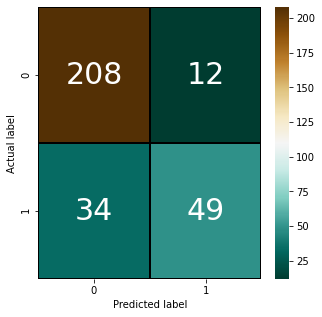

In [33]:
yprediciton= LR.predict(x)
ytrue = ytest.T

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(labels,yprediciton)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=1,cmap='BrBG_r',linecolor="black",fmt=".0f",ax=ax,annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
TP=CM[0][0]
TN=CM[1][1]
FN=CM[1][0]
FP=CM[0][1]
print('Accuracy for the hybrid model:',(TP+TN)/(TP+TN+FN+FP))
print('Sensitivity for the hybrid model:',(TP/(TP+FN)))
print('Specificity for the hybrid model:',(TN/(TN+FP)))
print('Precision for the hybrid model:',(TP/(TP+FP)))

Accuracy for the hybrid model: 0.8481848184818482
Sensitivity for the hybrid model: 0.859504132231405
Specificity for the hybrid model: 0.8032786885245902
Precision for the hybrid model: 0.9454545454545454
